
# <font size="6"> Predict Whether A Candidate is A Real Pulsar


# <font size="5"> 1.Introduction

**Pulsars** are rare neutron stars, as probes of space-time, the interstellar medium and the state of matter, which are very important for the study and development of natural sciences. The search for pulsars relies mainly on detecting signals emitted by periodic broadband radio emission patterns (averaged over multiple rotations) as they rotate at high speeds. However, in practice, all detections are caused by radio frequency interference (RFI) and noise, so it is difficult to find legitimate signals. Hence, the search for **real** pulsars is challenging. 

**Our question is to determine whether a candidate is a real pulsar?** 
HTRU2 is a dataset describing a sample of pulsar candidates collected during the High Temporal Resolution Universe Survey (South). It contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples. Eight continuous variables describe each candidate as below and first four of them are statistics obtained from integrated pulse profile and the remaining are from DM-SNR curve.This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency.Please see the information as below,
* Mean of the integrated profile.
* Standard deviation of the integrated profile.
* Excess kurtosis of the integrated profile.
* Skewness of the integrated profile.
* Mean of the DM-SNR curve.
* Standard deviation of the DM-SNR curve.
* Excess kurtosis of the DM-SNR curve.
* Skewness of the DM-SNR curve.
* Class:1 means real pulsar and 0 otherwise.

# <font size="5"> 2.Preliminary exploratory data analysis

Load the tidyverse, tidymodels and GGally package for data analysis.

In [55]:
library(tidyverse)
library(tidymodels)      
install.packages("GGally")                    
library("GGally")
library(rvest)


Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




Set the seed only once before loading data to gurantee our analysis to be reproducible.

In [56]:
set.seed(1)

Load the data and add column names manually to clean and wrangle data into tidy format; Also factor our predictor for classification. 

In [8]:
# pulsar_raw_data <-read_html("https://raw.githubusercontent.com/JeanetteOfficial/DSCI100_GroupProject_006_1/main/data/HTRU_2.csv") %>%
#  colname(pulsar_raw_data) <-c("Mean_IP","SD_IP","ExcessKurtosis_IP","Skewness_IP",
#                              "Mean_DS","SD_DS","ExcessKurtosis_DS","Skewness_DS","Class")%>%

pulsar_raw_data <- read_table2("https://raw.githubusercontent.com/JeanetteOfficial/DSCI100_GroupProject_006_1/main/data/HTRU_2.txt",
                          col_names = FALSE) 
pulsar_raw_data <- rename(pulsar_raw_data, "Mean_IP" = X1,
                         "SD_IP" = X2,
                         "ExcessKurtosis_IP" = X3,
                         "Skewness_IP" = X4,
                         "Mean_DS" = X5,
                         "SD_DS" = X6,
                         "ExcessKurtosis_DS" = X7,
                         "Skewness_DS" = X8,
                         "Class" = X9) 

#        Mean_IP = X1,
#        SD_IP = X2,
#        ExcessKurtosis_IP = X3,
#        Skewness_IP = X4,
#        Mean_DS = X5,
#        SD_DS = X6,
#        ExcessKurtosis_DS = X7,
#        Skewness_DS = X8, 
#        Class = X9) %>%
pulsar_raw_data <- mutate(pulsar_raw_data, Class = as_factor(Class)) 
head(pulsar_raw_data)
# pulsar_raw_data <- read_csv("data/HTRU_2.csv", col_names = FALSE) 
# pulsar_raw_data <-rename(pulsar_raw_data,
#        Mean_IP = X1,
#        SD_IP = X2,
#        ExcessKurtosis_IP = X3,
#        Skewness_IP = X4,
#        Mean_DS = X5,
#        SD_DS = X6,
#        ExcessKurtosis_DS = X7,
#        Skewness_DS = X8, 
#        Class = X9) %>%
# mutate(Class = as_factor(Class)) 
# head(pulsar_raw_data)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [9]:
glimpse(pulsar_raw_data)

Rows: 17,898
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.1998328, 1.6772575, 3.1212375, 3.6429766, 1.17892…
$ SD_DS             <dbl> 19.110426, 14.860146, 21.744669, 20.959280, 11.4687…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Create the train/test split for training an accurate model and achieving accurate evaluation for the model.

In [10]:
pulsar_split <- initial_split(pulsar_raw_data,prop=0.75,strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
glimpse(pulsar_train)

Rows: 13,424
Columns: 9
$ Mean_IP           <dbl> 140.56250, 103.01562, 136.75000, 119.48438, 130.382…
$ SD_IP             <dbl> 55.68378, 39.34165, 57.17845, 48.76506, 39.84406, 5…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.323328365, -0.068414638, 0.03146022…
$ Skewness_IP       <dbl> -0.69964840, 1.05116443, -0.63623837, -0.11216757, …
$ Mean_DS           <dbl> 3.1998328, 3.1212375, 3.6429766, 0.9991639, 1.22073…
$ SD_DS             <dbl> 19.110426, 21.744669, 20.959280, 9.279612, 14.37894…
$ ExcessKurtosis_DS <dbl> 7.975532, 7.735822, 6.896499, 19.206230, 13.539456,…
$ Skewness_DS       <dbl> 74.24222, 63.17191, 53.59366, 479.75657, 198.23646,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, …


Check if there are missing values in training data. If so, we have to deal with them first, otherwise our data analysis is not accurate. As we can observe above, row count remains the same meaning that there aren't any missing values.

In [17]:
na.omit(pulsar_train, cols=c("Mean_IP", "SD_IP", "ExcessKurtosis_IP", "Skewness_IP", 
                             "Mean_DS", "SD_DS", "ExcessKurtosis_DS", "Skewness_DS","Class")) %>%
head(6)
glimpse(pulsar_train)

Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
103.0156,39.34165,0.32332837,1.0511644,3.1212375,21.744669,7.735822,63.17191,0
136.7500,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,0
119.4844,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.3828,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0
107.2500,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,0


Rows: 13,424
Columns: 9
$ Mean_IP           <dbl> 140.56250, 103.01562, 136.75000, 119.48438, 130.382…
$ SD_IP             <dbl> 55.68378, 39.34165, 57.17845, 48.76506, 39.84406, 5…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.323328365, -0.068414638, 0.03146022…
$ Skewness_IP       <dbl> -0.69964840, 1.05116443, -0.63623837, -0.11216757, …
$ Mean_DS           <dbl> 3.1998328, 3.1212375, 3.6429766, 0.9991639, 1.22073…
$ SD_DS             <dbl> 19.110426, 21.744669, 20.959280, 9.279612, 14.37894…
$ ExcessKurtosis_DS <dbl> 7.975532, 7.735822, 6.896499, 19.206230, 13.539456,…
$ Skewness_DS       <dbl> 74.24222, 63.17191, 53.59366, 479.75657, 198.23646,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, …


Summarize the means of the 8 predictor variables in a table. Therefore, we are able to know whether each data is higher or lower than the average.

In [18]:
mean_pulsar_train <- pulsar_train %>%
summarize(AVG_MeanIP = mean(Mean_IP, na.rm = TRUE),
          AVG_SDIP = mean(SD_IP,na.rm = TRUE),
          AVG_ExcessKurtosisIP = mean(ExcessKurtosis_IP,na.rm = TRUE),
          AVG_SkewnessIP = mean(Skewness_IP,na.rm = TRUE),
          AVG_MeanDS = mean(Mean_DS,na.rm = TRUE),
          AVG_SDDS = mean(SD_DS,na.rm = TRUE),
          AVG_ExcessKurtosisDS = mean(ExcessKurtosis_DS,na.rm = TRUE),
          AVG_SkewnessDS = mean(Skewness_DS,na.rm = TRUE))         
mean_pulsar_train

AVG_MeanIP,AVG_SDIP,AVG_ExcessKurtosisIP,AVG_SkewnessIP,AVG_MeanDS,AVG_SDDS,AVG_ExcessKurtosisDS,AVG_SkewnessDS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111.2848,46.60468,0.4696269,1.708643,12.64601,26.4129,8.298769,104.9418


Summarize the proportion of each Class in a table.The proportion of Class 0 verses Class 1 is roughly 91% verses 9%, which means only 9% are real pulsar. It is predicted as there should be rare real pulsar. And also remind us that we need to balance the test data first to use them.

In [16]:
pulsar_proportions <- pulsar_train %>%
                      group_by(Class) %>%
                      summarize(n=n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))
pulsar_proportions

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percent
<fct>,<int>,<dbl>
0,12200,90.882002
1,1224,9.117998


Using ggpairs to compare the distribution of 8 predictor variables in our dataset and decide which one to use in our analysis.

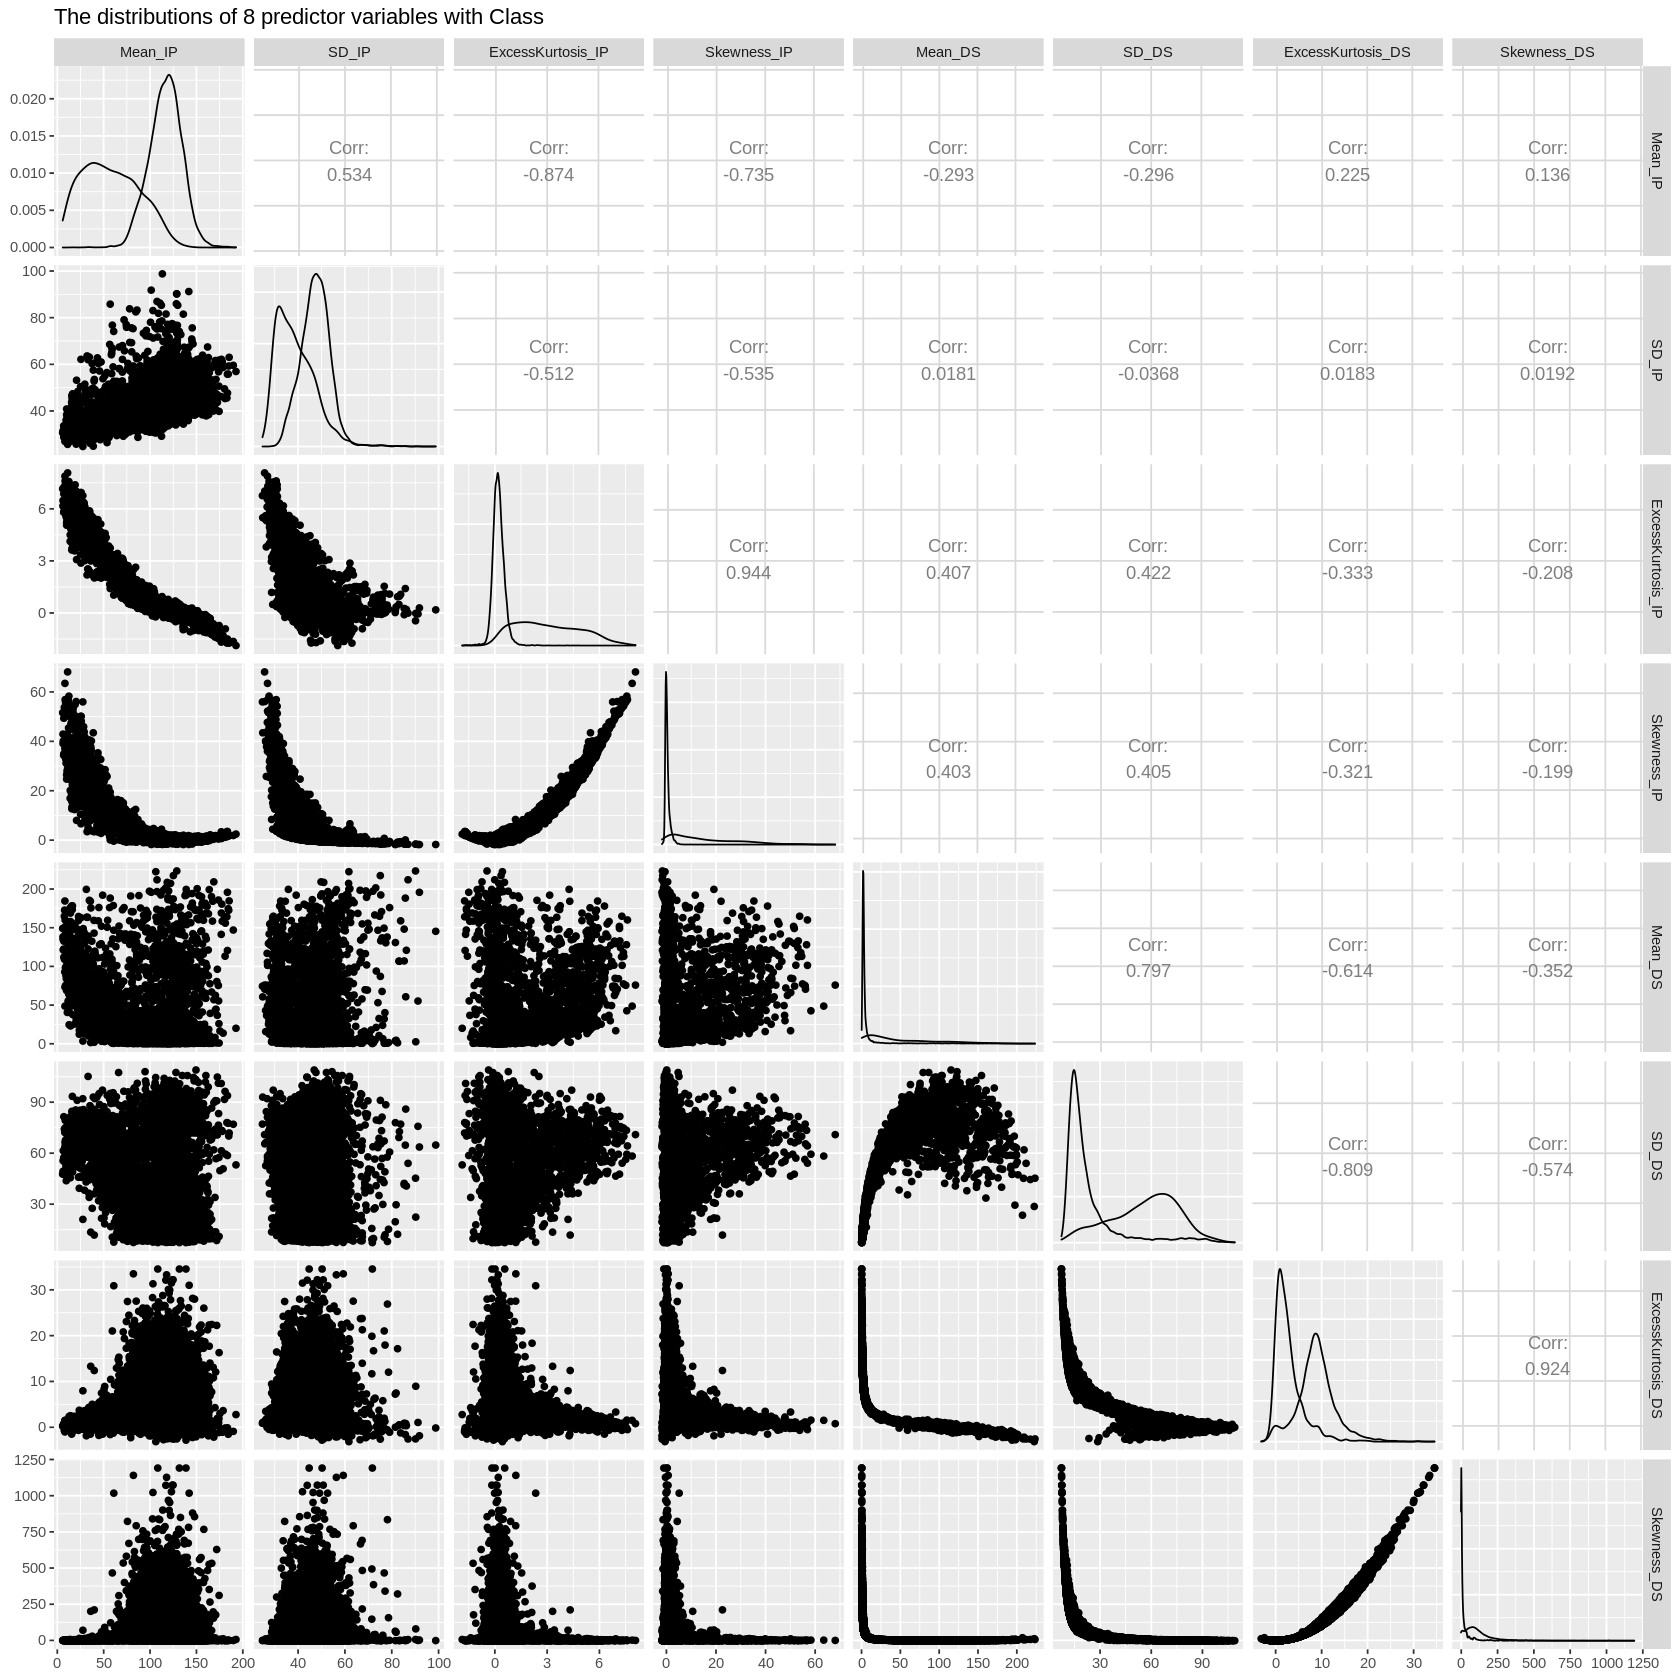

In [21]:
options(repr.plot.width = 14, repr.plot.height = 14)

pulsar_dist_plot <- pulsar_train %>%
   ggpairs(pulsar_train, columns = 1:8, aes(colour=Class),title="The distributions of 8 predictor variables with Class")
pulsar_dist_plot

pulsar_dist_plot <- pulsar_dist_plot +
                       theme(text = element_text(size = 20))

# <font size="4">Choosing Predictive Variables
By observing the above line graph, we find that all the 8 variables distribute well with Class 1 as well as Class 0, so all of them are  helpful for Class judgment. However, through the research we find that both kurtosis and skewness are functions of the mean and variance of a distribution and have very similar functional definitions(Bradley,2021). Therefore, we choose ExcessKurtos as we know more about kurtosis. Overall, we have 6 variables, which are Mean_IP,SD_IP,ExcessKurtosis_IP,Mean_DS,SD_DS and ExcessKurtosis_DS.
    
The following is a link for an online artical about predicting pulsar stars. 
https://towardsdatascience.com/predicting-pulsar-stars-an-imbalanced-classification-task-comparing-bootstrap-resampling-to-smote-8cfbe037b807

Using geom_histogram to see the distribution of Mean_IP with Class. The higher of the Mean_IP, the higher possibility for it to be a real pulsar.

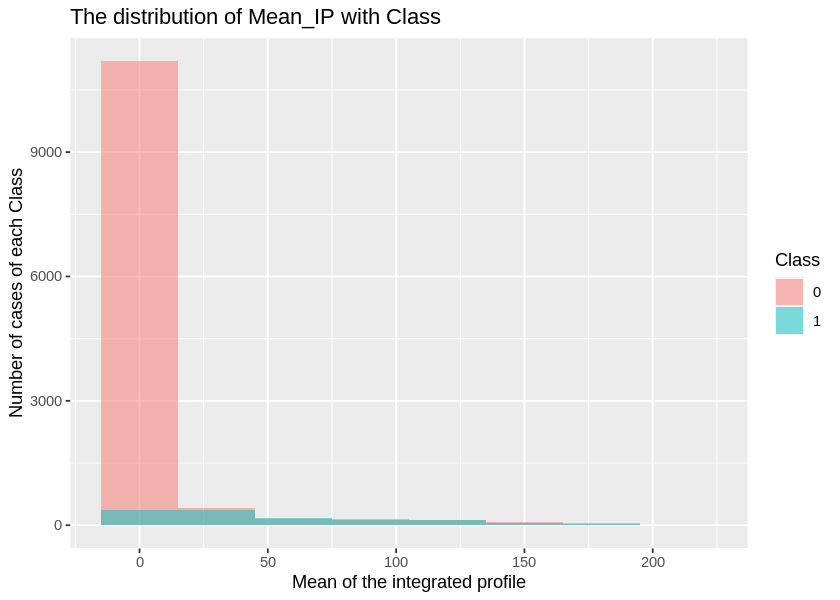

In [44]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_IP with Class")

Using geom_histogram to see the distribution of SD_IP with Class. It seems that if the SD_IP is lower than 40, then there is high possibility for it to be a real pulsar.

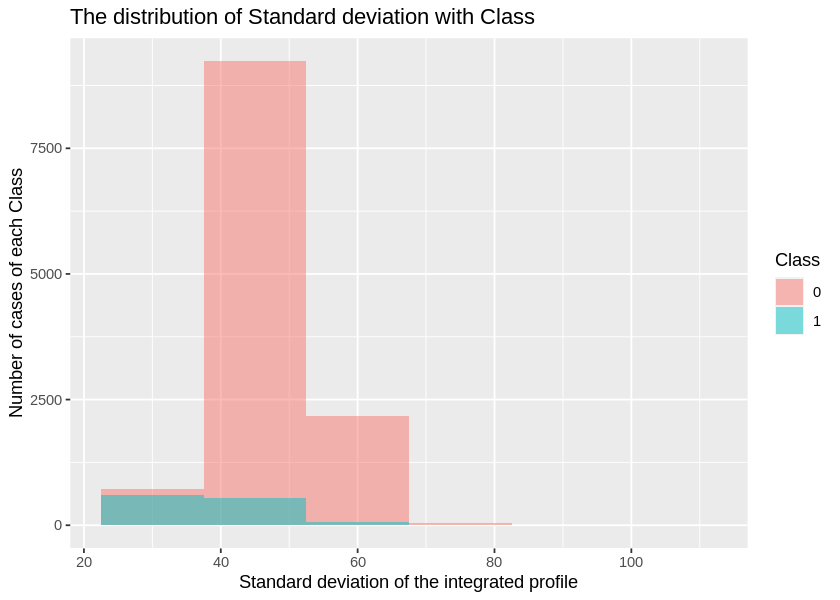

In [45]:
#use histogram to see the distribution of SD_IP
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= SD_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Standard deviation with Class")

Using geom_histogram to see the distribution of ExcessKurtosis_IP with Class. A real pulsar has higher excess kurtosis.

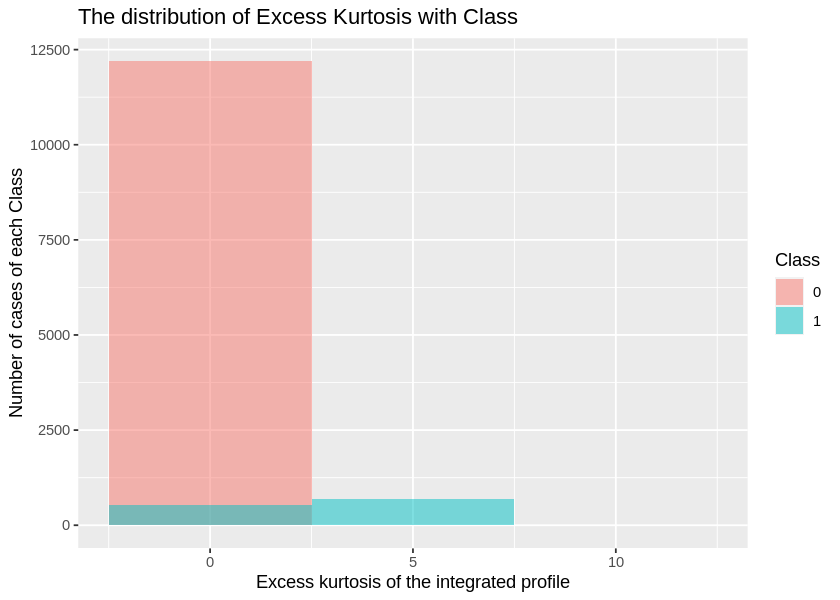

In [46]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= ExcessKurtosis_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Excess Kurtosis with Class")

Using histogram to see the distribution of Mean_DS with Class. The higher mean of the DM_SNR, the higher possibility to be a real pulsar.

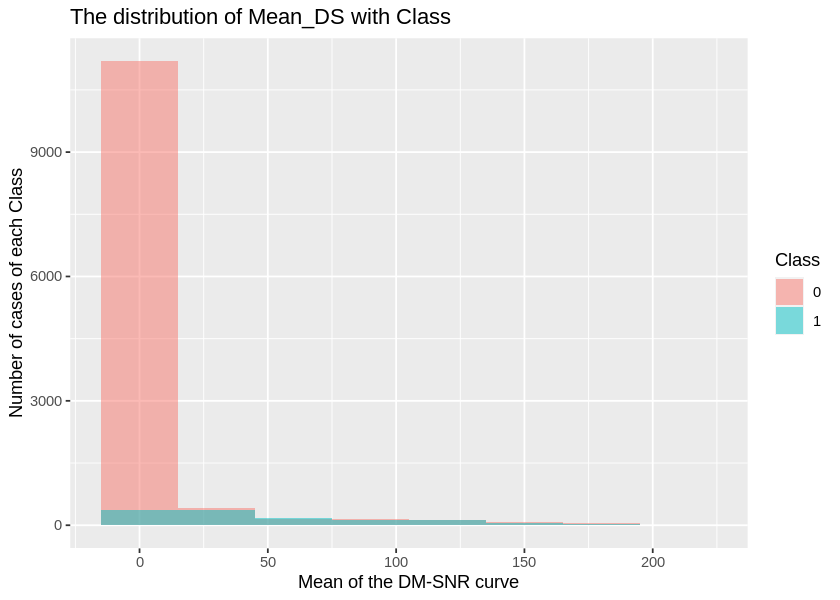

In [47]:
#use histogram to see the distribution of Mean_DS
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_DS with Class")

Using geom_histogram to see the distribution of SD_DS with Class. It is hard to predict pulsar with SD_DS only.

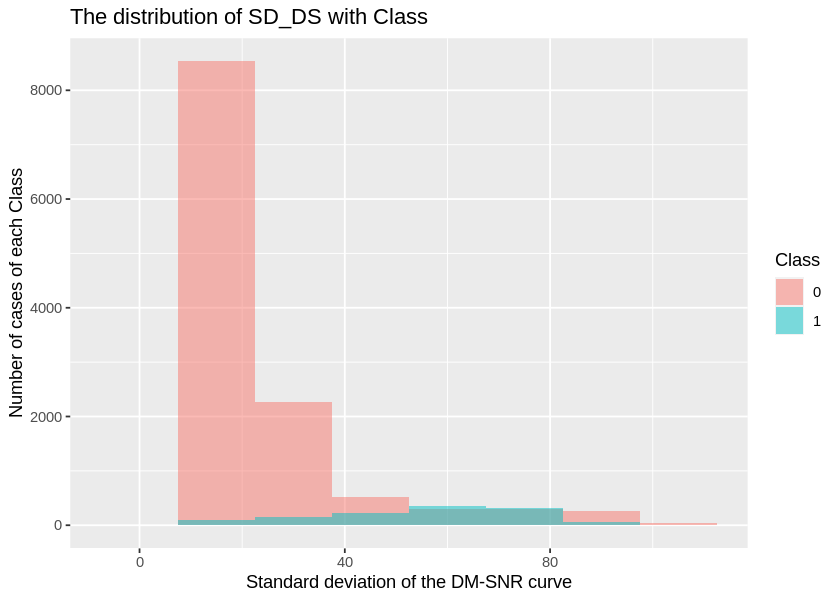

In [48]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= SD_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of SD_DS with Class")

Using geom_histogram to see the distribution of ExcessKurtosis_DS with Class. The smaller of the excess kurtosis of DM_SNR curve, the high possibility to be a pulsar.

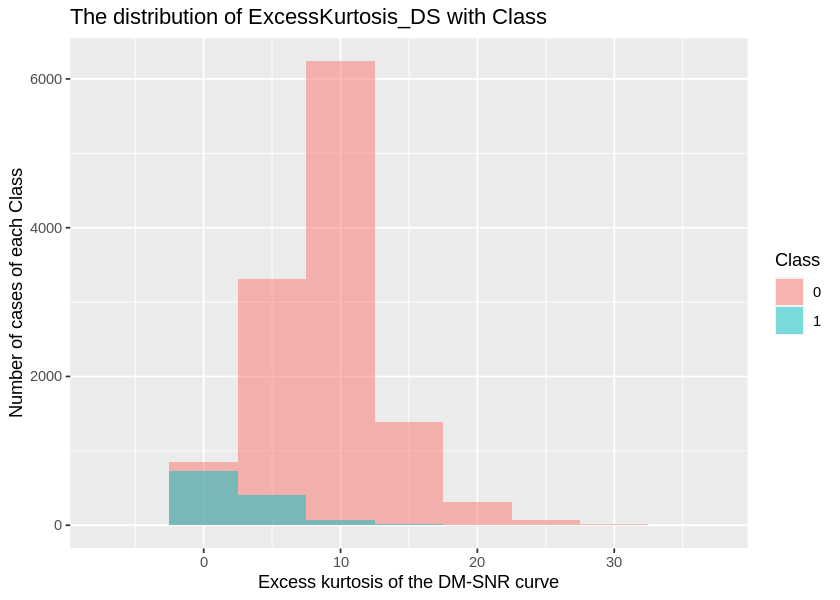

In [49]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= ExcessKurtosis_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of ExcessKurtosis_DS with Class")

Using scatter plot to visualize the distribution of Mean_IP vs Mean_DS, as both of them are mean data. The smaller the mean of the integrated profile, the higher possibility to be a pulsar; However, mean of DM_SNR curve does not influence the result that much.

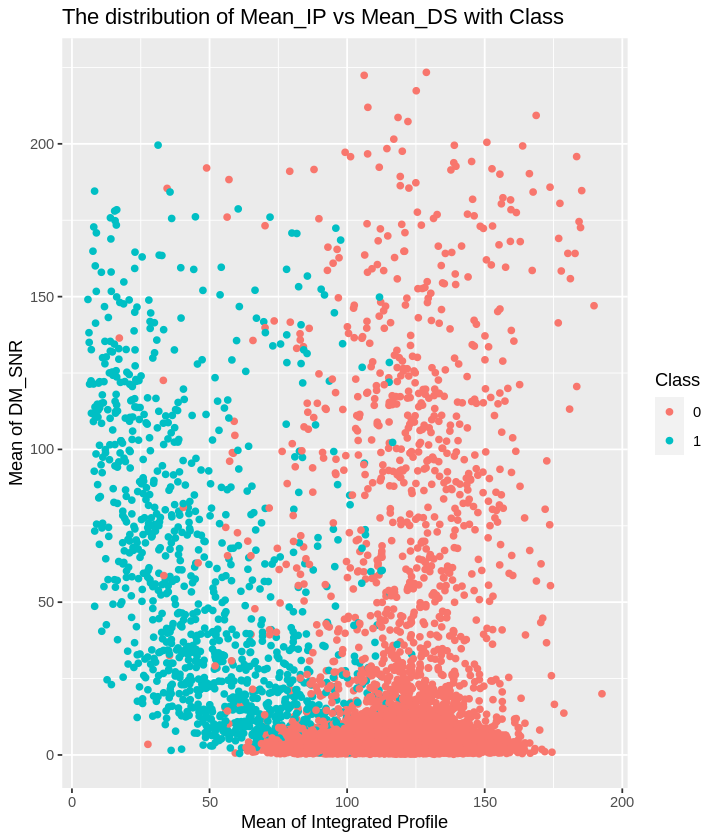

In [50]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train %>% 
    ggplot(aes(x= Mean_IP, y= Mean_DS, color = Class)) +
    geom_point() +
    labs(x = "Mean of Integrated Profile", 
       y = "Mean of DM_SNR",
       color = "Class") +
ggtitle("The distribution of Mean_IP vs Mean_DS with Class")

Using scatter plot to visualize the distribution of SD_IP vs SD_DS, as both of them are standard derivation. A real pulsar has a lower standard derivation of the integrated profile.

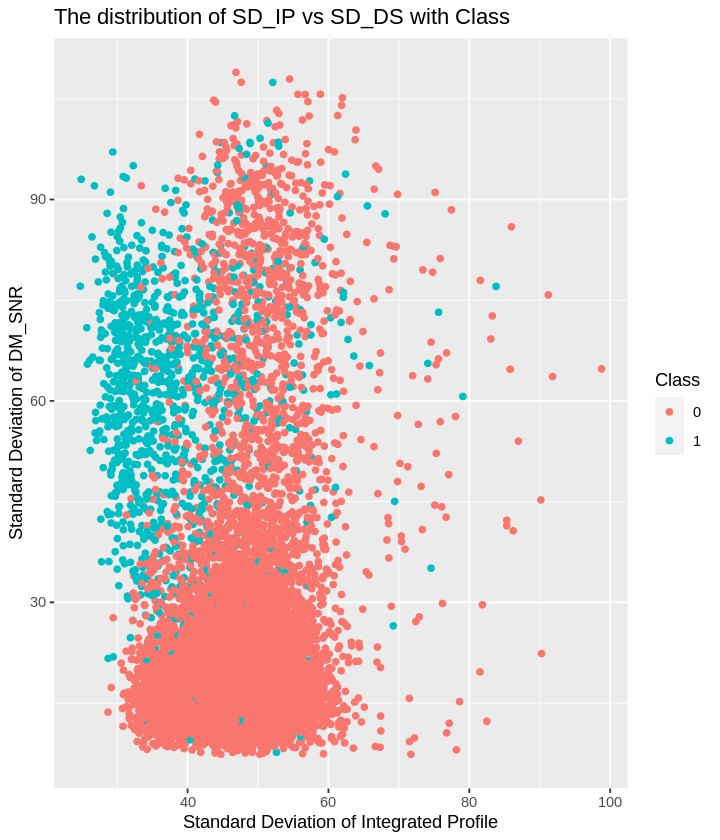

In [51]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train %>% 
    ggplot(aes(x= SD_IP, y= SD_DS, color = Class)) +
    geom_point() +
    labs(x = "Standard Deviation of Integrated Profile", 
       y = "Standard Deviation of DM_SNR",
       color = "Class") +
ggtitle("The distribution of SD_IP vs SD_DS with Class")


Using scatter plot to visualize the distribution of ExcessKurtosis_IP vs ExcessKurtosis_DS with Class. It is found that pulsar has a higher Excess Kurtosis of Integrated Profile and lower Excess Kurtosis of DM-SMR curve. 
So we can further analysis whether there is a threshold for that.

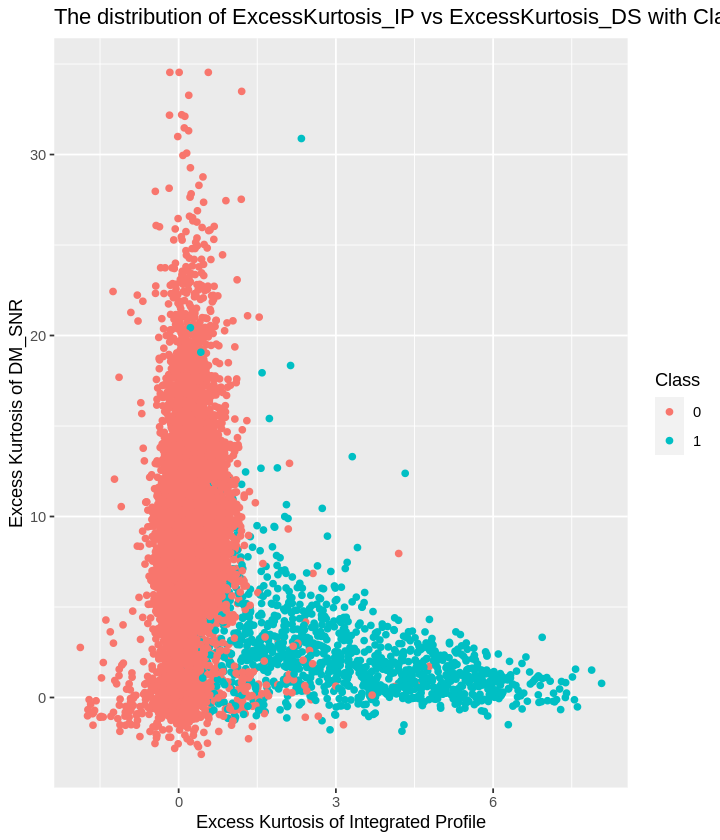

In [52]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train %>% 
    ggplot(aes(x= ExcessKurtosis_IP, y= ExcessKurtosis_DS, color = Class)) +
    geom_point() +
    labs(x = "Excess Kurtosis of Integrated Profile", 
       y = "Excess Kurtosis of DM_SNR",
       color = "Class") +
ggtitle("The distribution of ExcessKurtosis_IP vs ExcessKurtosis_DS with Class")


# <font size="5"> 4.Methods

In summary of the above steps, in order to conduct an accurate data analysis, the first thing we did after we got the raw data is to 

* Read the file from online using `read_table2` 
* Wrangle data into tidy format
* Split the raw data into testing and training data using `initial_split`
* Use `mutate` and `as_factor` to define the predicting factor
* Use `ggpairs` and `ggplot` to visualize and compare the given predictor variables'distribution for each class to determine the final predictor variable to use in predicting, which are: Mean of the integrated profile(`Mean_IP`); Standard deviation of the integrated profile(`SD_IP`); Excess kurtosis of the integrated profile(`ExcessKurtosis_IP`); Mean of the DM-SNR curve(`Mean_DS`); Standard deviation of the DM-SNR curve(`SD_DS`); Excess kurtosis of the DM-SNR curve(`ExcessKurtosis_DS`).

These steps are some basic data-preparing stage.
After that, we are going to use our "prepared data" to predict the candidate's class. The following are some specific steps. 

* Create a model specification for K-nearest neighbours classification by using the `nearest_neighbor` function.
* Using the function `recipe` to get rid of the variables we do not need, and center and scale the variables we have already chosen to get the data ready to predict properly.
* Using the function `fit` to estimate the parameters for a given model from our trained pulsar star data and the K-nearest neighbours model from the last step. 
* Use `tibble` function to create our hypothesis example.
* Use `predict` function to finally predict the class of our hypothesis candidate.

# <font size="5"> 5.Expected outcomes and significance

We expect to find that if a candidate has lower Mean of Integrated Profile (<40),lower Standard Deviation of Integrated Profile (<50) and higher ExcessKurtosis of Integrated Profile (>3), then this candidate have a high possibility to be a pulsar.


This report analyze the influence of each predictive variables on the determination of real pulsars and find the most influential factors. And luckily train a model to predict whether a candidate is a pulsar. The results will facilitate  pulsars seach. It is meaningful as pulsars are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.Therefore, this model will contribute to the study of pulsars and the development of natural science. 

What's more, there are some future questions we can think of about our data analysis project's topic: Predicting the real pulsar stars.

* Whether our model can be used to predict Magnetar,which are also neutron stars?
* The given raw dataset has some variables including the mean and the standard deviation. How about the median and the mode? 
* What other variables can be also significant on determining whether or not it's a real pulsar star?